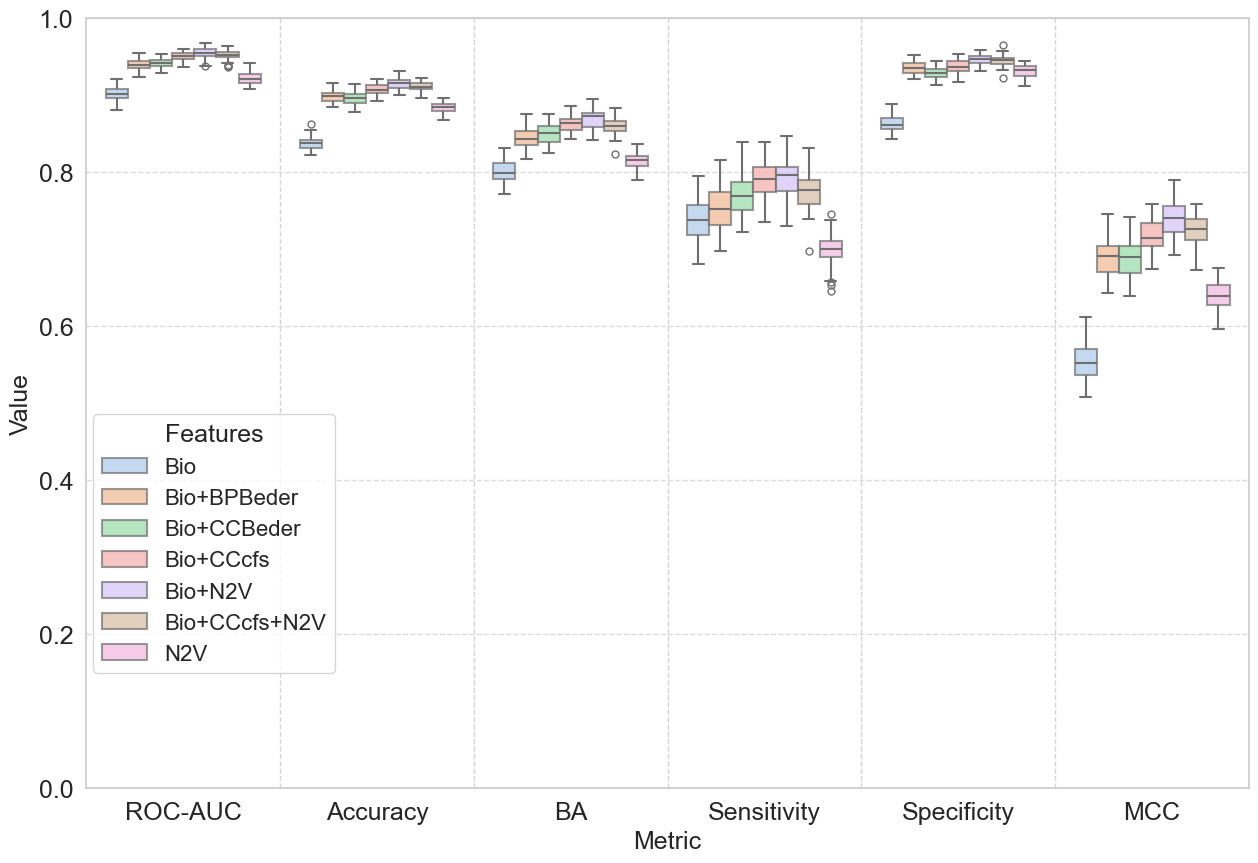

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

tissue = 'Kidney'
problem = 'EvsNE'
method1 = 'HELP'
method2 = 'AdAM'
method3 = 'FiPer'
method4 = 'OGEE'

scorepath = '../scores'
# Upload input datasets
Bio = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_bio.csv")).drop("CM", axis=1)
Bio['Feature'] = "Bio"

BioBP = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_biobpbeder.csv")).drop("CM", axis=1)
BioBP['Feature'] = "Bio+BPBeder"

BioCC = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_bioccbeder.csv")).drop("CM", axis=1)
BioCC['Feature'] = "Bio+CCBeder"

BioCCcfs = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_biocc.csv")).drop("CM", axis=1)
BioCCcfs['Feature'] = "Bio+CCcfs"

BioN2V = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_bion2v.csv")).drop("CM", axis=1)
BioN2V['Feature'] = "Bio+N2V"

BioCCN2V = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_bioccn2v.csv")).drop("CM", axis=1)
BioCCN2V['Feature'] = "Bio+CCcfs+N2V"

N2V = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_n2v.csv")).drop("CM", axis=1)
N2V['Feature'] = "N2V"

# Merge datasets and modify the dataframe for boxplot generation
Scores = pd.concat([Bio, BioBP, BioCC, BioCCcfs, BioN2V, BioCCN2V, N2V])
Scores = pd.melt(Scores, id_vars=["Feature"], var_name="Metric", value_name="Value")

# Set seaborn style
sns.set(style="whitegrid", palette="pastel")

# Generate boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(x="Metric", y="Value", hue="Feature", data=Scores, dodge=True,
            linewidth=1.5, fliersize=5, saturation=0.75, notch=False, boxprops=dict(alpha=0.7))

plt.ylim(0, 1)
#plt.title("Boxplots of Classification Metrics", fontsize=18)
plt.xlabel("Metric", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.legend(title="Features", fontsize="16", title_fontsize="18", loc="upper center", bbox_to_anchor=(0.11, 0.5))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add vertical lines between groups of metric values
unique_metrics = Scores["Metric"].unique()
for i in range(1, len(unique_metrics)):
    plt.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=1)

plt.show()


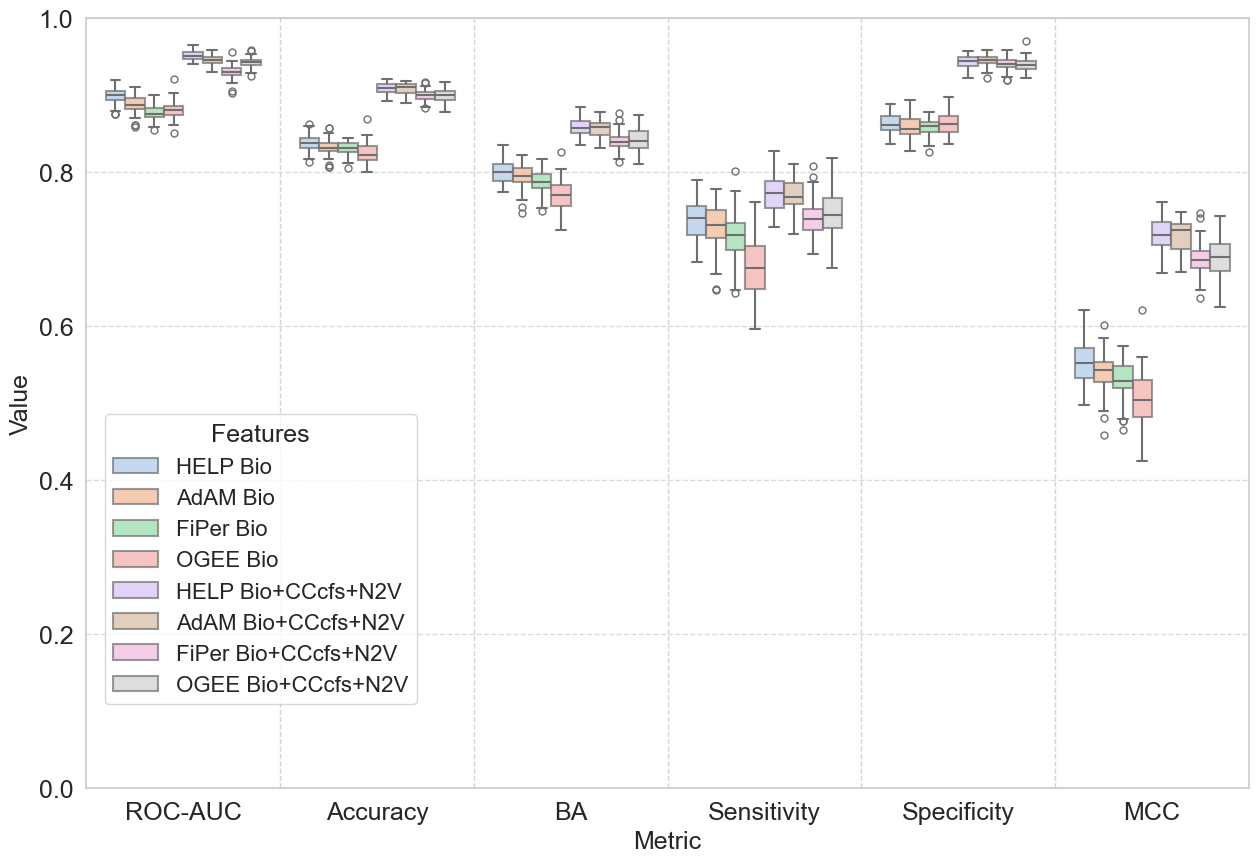

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

tissue = 'Kidney'
problem = 'EvsNE'
method1 = 'HELP'
method2 = 'AdAM'
method3 = 'FiPer'
method4 = 'OGEE'

scorepath = '../scores'
# Upload input datasets
M1_Bio = pd.read_csv(os.path.join(scorepath, f"score_cmp_{method1}_{tissue}_{problem}_bio.csv")).drop("CM", axis=1)
M1_Bio['Feature'] = f"{method1} Bio"

M2_Bio = pd.read_csv(os.path.join(scorepath, f"score_cmp_{method2}_{tissue}_{problem}_bio.csv")).drop("CM", axis=1)
M2_Bio['Feature'] = f"{method2} Bio"

M3_Bio = pd.read_csv(os.path.join(scorepath, f"score_cmp_{method3}_{tissue}_{problem}_bio.csv")).drop("CM", axis=1)
M3_Bio['Feature'] = f"{method3} Bio"

M4_Bio = pd.read_csv(os.path.join(scorepath, f"score_cmp_{method4}_{tissue}_{problem}_bio.csv")).drop("CM", axis=1)
M4_Bio['Feature'] = f"{method4} Bio"

M1_BioCCN2V = pd.read_csv(os.path.join(scorepath, f"score_cmp_{method1}_{tissue}_{problem}_bioccn2v.csv")).drop("CM", axis=1)
M1_BioCCN2V['Feature'] =f"{method1} Bio+CCcfs+N2V"

M2_BioCCN2V = pd.read_csv(os.path.join(scorepath, f"score_cmp_{method2}_{tissue}_{problem}_bioccn2v.csv")).drop("CM", axis=1)
M2_BioCCN2V['Feature'] = f"{method2} Bio+CCcfs+N2V"

M3_BioCCN2V = pd.read_csv(os.path.join(scorepath, f"score_cmp_{method3}_{tissue}_{problem}_bioccn2v.csv")).drop("CM", axis=1)
M3_BioCCN2V['Feature'] = f"{method3} Bio+CCcfs+N2V"

M4_BioCCN2V = pd.read_csv(os.path.join(scorepath, f"score_cmp_{method4}_{tissue}_{problem}_bioccn2v.csv")).drop("CM", axis=1)
M4_BioCCN2V['Feature'] = f"{method4} Bio+CCcfs+N2V"


# Merge datasets and modify the dataframe for boxplot generation
Scores = pd.concat([M1_Bio, M2_Bio, M3_Bio, M4_Bio, M1_BioCCN2V, M2_BioCCN2V, M3_BioCCN2V, M4_BioCCN2V])
Scores = pd.melt(Scores, id_vars=["Feature"], var_name="Metric", value_name="Value")

# Set seaborn style
sns.set(style="whitegrid", palette="pastel")

# Generate boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(x="Metric", y="Value", hue="Feature", data=Scores, dodge=True,
            linewidth=1.5, fliersize=5, saturation=0.75, notch=False, boxprops=dict(alpha=0.7))

plt.ylim(0, 1)
#plt.title("Boxplots of Classification Metrics", fontsize=18)
plt.xlabel("Metric", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.legend(title="Features", fontsize="16", title_fontsize="18", loc="upper center", bbox_to_anchor=(0.15, 0.5))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add vertical lines between groups of metric values
unique_metrics = Scores["Metric"].unique()
for i in range(1, len(unique_metrics)):
    plt.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=1)

plt.show()
